## Figure 3

code for generating each plot in Fig. 2

Imports and needed data:

In [1]:
import sys
import os

# Get the absolute path to the project root (one directory up from notebooks/)
root_path = os.path.abspath("..")
sys.path.append(root_path)

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from src import figure_Tools as fT

# node/vertex values dataset
df_vertex = pd.read_pickle("../Data/Vertex_data.pkl")

# we want to invert layer depths for T5 (1 - layer depth)
df_vertex.loc[df_vertex.Type == 'T5','Layer_Depth'] = 1 - df_vertex.loc[df_vertex.Type == 'T5','Layer_Depth']

### Figure 3b

Distribution of point depth within Medulla layer 10 for T4 subtypes. Solid lines show depths of first branching points, dashed lines show the depth of all other points.

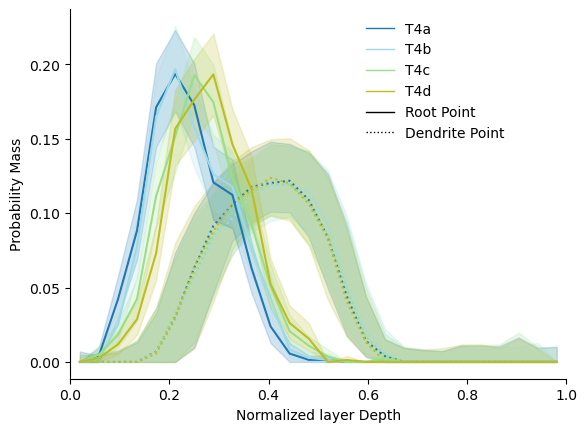

In [2]:
fig, ax = plt.subplots()

sub_df = df_vertex.loc[(df_vertex.Normalized_root_Distance != 0) & (df_vertex.Type == 'T4')]
fT.repeated_measures_PMF_df(ax = ax, 
                            df = sub_df, 
                            DV = 'Layer_Depth',
                            group_col = 'Subtype', 
                            # groups = designations,
                            # colours= designation_colours,
                            groups = fT.Subtypes[:4],
                            colours = fT.Subtype_colours[:4], 
                            x0 = 0, 
                            x1 = 1, 
                            num_bins = 26,
                            fill_kwargs = {'alpha': 0.2}, 
                            line_kwargs = {'ls':'dotted'}
)
sub_df = df_vertex.loc[(df_vertex.Normalized_root_Distance == 0) & (df_vertex.Type == 'T4')]
fT.point_value_PMF_df(ax = ax, 
                    df = sub_df, 
                    DV = 'Layer_Depth',
                    group_col = 'Subtype', 
                    # groups = designations,
                    # colours= designation_colours,
                    groups = fT.Subtypes[:4],
                    colours = fT.Subtype_colours[:4], 
                    x0 = 0, 
                    x1 = 1, 
                    num_bins = 26,
                    fill_kwargs = {'alpha': 0.2}, 
                    line_kwargs = dict(),
                    num_bootstraps = 1000,
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Create proxy handles for legend
handles = [
    Line2D([0], [0], color=color, lw=1) 
    for color in fT.Subtype_colours[:4]
]
handles.append(Line2D([0],[0], color = 'k', lw = 1))
handles.append(Line2D([0],[0], color = 'k', lw = 1, ls = 'dotted'))

handle_txt = list(fT.Subtypes[:4])
handle_txt.append('Root Point')
handle_txt.append('Dendrite Point')
# Add legend
ax.legend(handles, handle_txt, frameon = False, fontsize = 10, loc = 'upper right', bbox_to_anchor = (0.9,1))
ax.set_xlabel('Normalized layer Depth');
ax.set_ylabel('Probability Mass');

### Figure 3c

As above, but for T5 in Lobula layer 1

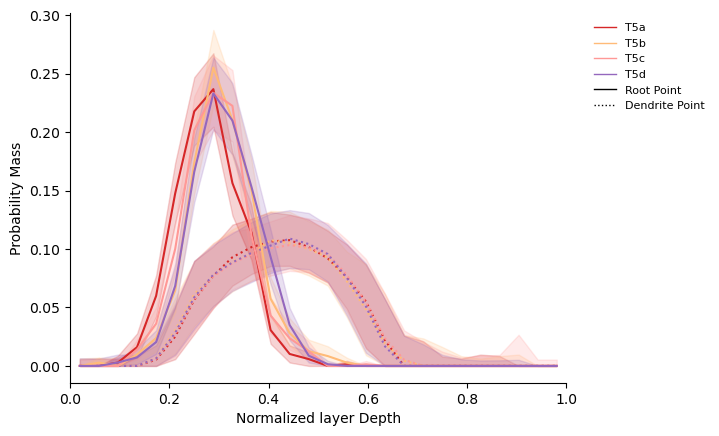

In [3]:
fig, ax = plt.subplots()

sub_df = df_vertex.loc[(df_vertex.Normalized_root_Distance != 0) & (df_vertex.Type == 'T5')]
fT.repeated_measures_PMF_df(ax = ax, 
                            df = sub_df, 
                            DV = 'Layer_Depth',
                            group_col = 'Subtype', 
                            # groups = designations,
                            # colours= designation_colours,
                            groups = fT.Subtypes[4:],
                            colours = fT.Subtype_colours[4:], 
                            x0 = 0, 
                            x1 = 1, 
                            num_bins = 26,
                            fill_kwargs = {'alpha': 0.2}, 
                            line_kwargs = {'ls':'dotted'}
)
sub_df = df_vertex.loc[(df_vertex.Normalized_root_Distance == 0) & (df_vertex.Type == 'T5')]
fT.point_value_PMF_df(ax = ax, 
                    df = sub_df, 
                    DV = 'Layer_Depth',
                    group_col = 'Subtype', 
                    # groups = designations,
                    # colours= designation_colours,
                    groups = fT.Subtypes[4:],
                    colours = fT.Subtype_colours[4:], 
                    x0 = 0, 
                    x1 = 1, 
                    num_bins = 26,
                    fill_kwargs = {'alpha': 0.2}, 
                    line_kwargs = dict(),
                    num_bootstraps = 1000,
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Create proxy handles for legend
handles = [
    Line2D([0], [0], color=color, lw=1) 
    for color in fT.Subtype_colours[4:]
]
handles.append(Line2D([0],[0], color = 'k', lw = 1))
handles.append(Line2D([0],[0], color = 'k', lw = 1, ls = 'dotted'))

handle_txt = list(fT.Subtypes[4:])
handle_txt.append('Root Point')
handle_txt.append('Dendrite Point')
# Add legend
ax.legend(handles, handle_txt, frameon = False, fontsize = 8, loc = 'upper right', bbox_to_anchor = (1.3,1))
ax.set_xlabel('Normalized layer Depth');
ax.set_ylabel('Probability Mass');

### Figure 3d

Relationship between point layer depth and euclidean distance from the first branching point in T4.

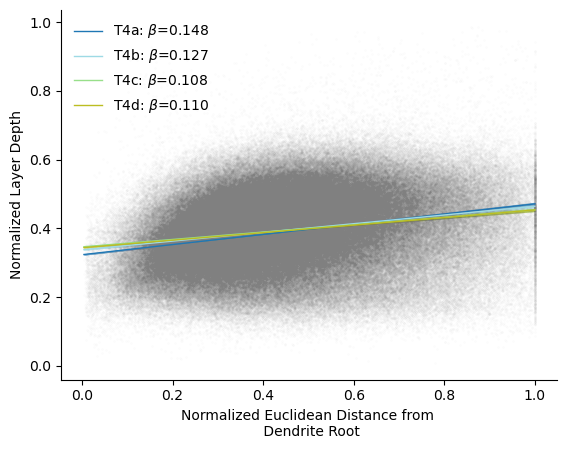

In [14]:
df = df_vertex.loc[df_vertex.Type == "T4"]
df = df.loc[(df.Normalized_root_Distance != 0) & (df.Normalized_root_Distance != 1)]

# params currently, df, formula
fig, ax = plt.subplots()


### function body
fT.regPlot(
    ax=ax,
    df=df,
    DV="Layer_Depth",
    IV_col="Euclidean_distance",
    group_col="Subtype",
    groups=fT.Subtypes[:4],
    colours=fT.Subtype_colours[:4],
    point_kwargs={"alpha": 0.05, "c": "gray", "s": 0.1, "rasterized": True},
    legend_kwargs={"frameon": False, "loc": "upper left"},
    fill_kwargs={"alpha": 0.5},
    line_kwargs={"lw": 1},
)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Normalized Euclidean Distance from \n Dendrite Root")
ax.set_ylabel("Normalized Layer Depth");

### Figure 3e

As above but for T5

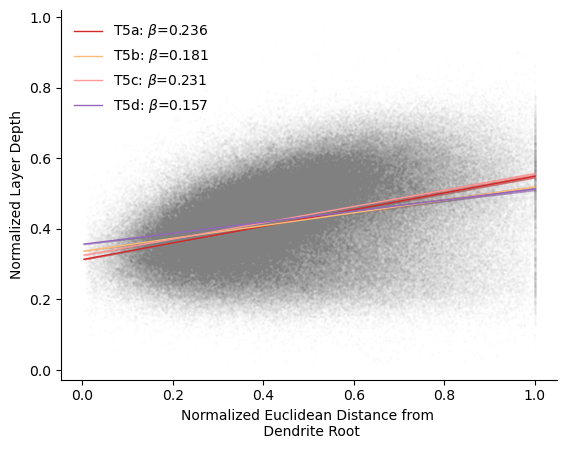

In [15]:
df = df_vertex.loc[df_vertex.Type == "T5"]
df = df.loc[(df.Normalized_root_Distance != 0) & (df.Normalized_root_Distance != 1)]

# params currently, df, formula
fig, ax = plt.subplots()


### function body
fT.regPlot(
    ax=ax,
    df=df,
    DV="Layer_Depth",
    IV_col="Euclidean_distance",
    group_col="Subtype",
    groups=fT.Subtypes[4:],
    colours=fT.Subtype_colours[4:],
    point_kwargs={"alpha": 0.05, "c": "gray", "s": 0.1, "rasterized": True},
    legend_kwargs={"frameon": False, "loc": "upper left"},
    fill_kwargs={"alpha": 0.5},
    line_kwargs={"lw": 1},
)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Normalized Euclidean Distance from \n Dendrite Root")
ax.set_ylabel("Normalized Layer Depth");